<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/tutorials/W2D4_AIandClimateChange/student/W2D4_Tutorial5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/neuromatch/climate-course-content/blob/main/tutorials/W2D4_AIandClimateChange/student/W2D4_Tutorial5.ipynb)   <a href="https://kaggle.com/kernels/welcome?src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D4_AIandClimateChange/student/W2D4_Tutorial5.ipynb" target="_blank"><img alt="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"/></a>

# Tutorial 5:  Testing generalization to new scenarios

**Week 2, Day 4, AI and Climate Change**

**Content creators:**  Deepak Mewada, Grace Lindsay

**Content reviewers:** Mujeeb Abdulfatai, Nkongho Ayuketang Arreyndip, Jeffrey N. A. Aryee, Paul Heubel, Jenna Pearson, Abel Shibu

**Content editors:** Deepak Mewada, Grace Lindsay

**Production editors:** Paul Heubel, Konstantine Tsafatinos

**Our 2024 Sponsors:** CMIP, NFDI4Earth

# Tutorial Objectives

*Estimated timing of tutorial:* 20 minutes

In this tutorial, you will
* Learn about a different type of out-of-distribution test of our model.
* Evaluate the model's performance.


# Setup

In [1]:
# imports

import matplotlib.pyplot as plt                           # For plotting graphs
import pandas as pd                                       # For data manipulation
# Import specific machine learning models and tools
from sklearn.model_selection import train_test_split      # For splitting dataset into train and test sets
from sklearn.ensemble import RandomForestRegressor        # For Random Forest Regression

In [2]:
# @title Install and import feedback gadget

!pip3 install vibecheck datatops --quiet

from vibecheck import DatatopsContentReviewContainer
def content_review(notebook_section: str):
    return DatatopsContentReviewContainer(
        "",  # No text prompt
        notebook_section,
        {
            "url": "https://pmyvdlilci.execute-api.us-east-1.amazonaws.com/klab",
            "name": "comptools_4clim",
            "user_key": "l5jpxuee",
        },
    ).render()


feedback_prefix = "W2D4_T5"

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.3 MB/s eta 0:00:00


In [3]:
# @title Figure Settings
import ipywidgets as widgets  # interactive display

%config InlineBackend.figure_format = 'retina'
plt.style.use(
    "https://raw.githubusercontent.com/neuromatch/climate-course-content/main/cma.mplstyle"
)

In [19]:
# @title Helper functions

# Load and Prepare the Data
url_Climatebench_train_val = "https://osf.io/y2pq7/download"  # Dataset URL
training_data = pd.read_csv(url_Climatebench_train_val)  # load the training data from the provided URL
training_data.pop('scenario')  # drop the 'scenario' column as it's just a label and won't be passed into the model
target = training_data.pop('tas_FINAL')  # extract the target variable 'tas_FINAL' which we aim to predict

url_spatial_test_data = "https://osf.io/7tr49/download" # test data with different location
spatial_test_data = pd.read_csv(url_spatial_test_data)  # load spatial test data from the provided URL
spatial_test_data.pop('scenario')  # drop the `scenario` column from the data as it is just a label, but will not be passed into the model.
spatial_test_target = spatial_test_data.pop('tas_FINAL')  # extract the target variable 'tas_FINAL'

# Split the data into training and testing sets: 80%/20%
X_train, X_test, y_train, y_test = train_test_split(training_data, target, test_size=0.2, random_state=1)

# Training the model on the training data
rf_regressor = RandomForestRegressor(random_state=42, n_estimators=80, max_depth=50)
rf_regressor.fit(X_train, y_train)

spatial_test_score = rf_regressor.score(spatial_test_data,spatial_test_target)

In [5]:
# @title Set random seed

# @markdown Executing `set_seed(seed=seed)` you are setting the seed

# Call `set_seed` function in the exercises to ensure reproducibility.
import random
import numpy as np

def set_seed(seed=None):
    if seed is None:
        seed = np.random.choice(2 ** 32)
    random.seed(seed)
    np.random.seed(seed)
    print(f'Random seed {seed} has been set.')

# Set a global seed value for reproducibility
random_state = 42 # change 42 with any number you like

set_seed(seed=random_state)

Random seed 42 has been set.


In [6]:
# @title Video 1: Testing generalization to new scenarios

from ipywidgets import widgets
from IPython.display import YouTubeVideo
from IPython.display import IFrame
from IPython.display import display


class PlayVideo(IFrame):
    def __init__(self, id, source, page=1, width=400, height=300, **kwargs):
        self.id = id
        if source == 'Bilibili':
            src = f'https://player.bilibili.com/player.html?bvid={id}&page={page}'
        elif source == 'Osf':
            src = f'https://mfr.ca-1.osf.io/render?url=https://osf.io/download/{id}/?direct%26mode=render'
        super(PlayVideo, self).__init__(src, width, height, **kwargs)


def display_videos(video_ids, W=400, H=300, fs=1):
    tab_contents = []
    for i, video_id in enumerate(video_ids):
        out = widgets.Output()
        with out:
            if video_ids[i][0] == "Youtube":
                video = YouTubeVideo(
                    id=video_ids[i][1], width=W, height=H, fs=fs, rel=0
                )
                print(f"Video available at https://youtube.com/watch?v={video.id}")
            else:
                video = PlayVideo(
                    id=video_ids[i][1],
                    source=video_ids[i][0],
                    width=W,
                    height=H,
                    fs=fs,
                    autoplay=False,
                )
                if video_ids[i][0] == "Bilibili":
                    print(
                        f"Video available at https://www.bilibili.com/video/{video.id}"
                    )
                elif video_ids[i][0] == "Osf":
                    print(f"Video available at https://osf.io/{video.id}")
            display(video)
        tab_contents.append(out)
    return tab_contents

video_ids = [('Youtube', 'GGy_kFLzBiw'), ('Bilibili', 'BV1UJGDeLETs'), ('Osf', '<video_id_3>')]
tab_contents = display_videos(video_ids, W=854, H=480)
tabs = widgets.Tab()
tabs.children = tab_contents
for i in range(len(tab_contents)):
    tabs.set_title(i, video_ids[i][0])
display(tabs)

Video Summary :  
* Discussed how we previously tested generalization to an unseen region.
* Stressed that the real utility of these emulators is the ability to run new scenarios.
* Now we will see if the model generalizes to data from a new scenario.


In [7]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Testing_generalization_to_new_scenarios_Video")

In [8]:
# @title Tutorial slides

# @markdown
from ipywidgets import widgets
from IPython.display import IFrame

link_id = "2rq8x"

print(f"If you want to download the slides: https://osf.io/download/{link_id}/")
IFrame(src=f"https://mfr.ca-1.osf.io/render?url=https://osf.io/{link_id}/?direct%26mode=render%26action=download%26mode=render", width=854, height=480)

If you want to download the slides: https://osf.io/download/2rq8x/


In [9]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Testing_generalization_to_new_scenarios_Slides")

# Section 1: Test Generalization to Held-out Emissions Scenario

## Section 1.1: Load the New Testing (Scenario) Data
Load the new dataset and print it. As you can see, the scenario for all of these datapoints is ssp245. This scenario was not included in our initial data set. According to the scenario descriptions included in the table in Tutorial 1, ssp245 represent a "medium forcing future scenario". The lat/lon locations are the same as the initial dataset (blue box region).

In [10]:
url_scenario_test_data = "https://osf.io/pkbwx/download"  # Dataset URL
scenario_test_data = pd.read_csv(url_scenario_test_data)  # Load scenario test data from the provided URL
scenario_test_data

,scenario,lat,lon,tas_2015,pr_2015,pr90_2015,dtr_2015,tas_FINAL,CO2_2015,SO2_2015,...,CH4_2048,BC_2048,CO2_2049,SO2_2049,CH4_2049,BC_2049,CO2_2050,SO2_2050,CH4_2050,BC_2050
0,ssp245,-19.894737,0.0,0.555990,-9.931833e-08,-3.426345e-07,-0.042485,0.839935,1536.072222,6.686393e-08,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
1,ssp245,-19.894737,2.5,0.547587,-2.084760e-07,-5.129149e-07,-0.055545,0.800608,1536.072222,6.686393e-08,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
2,ssp245,-19.894737,5.0,0.476858,-3.123266e-07,-7.148436e-07,-0.065286,0.739756,1536.072222,6.686393e-08,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
3,ssp245,-19.894737,7.5,0.309591,-1.828261e-07,-8.008969e-07,-0.044665,0.824819,1536.072222,6.686393e-08,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
4,ssp245,-19.894737,10.0,0.169423,-6.493187e-08,-7.357342e-07,-0.024194,0.984558,1536.072222,6.686393e-08,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,ssp245,63.473684,32.5,0.084310,1.681694e-06,4.141917e-06,-0.530416,1.196798,1536.072222,6.686393e-08,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
806,ssp245,63.473684,35.0,0.081848,1.380857e-06,3.192422e-06,-0.447510,1.191854,1536.072222,6.686393e-08,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
807,ssp245,63.473684,37.5,0.215474,1.626266e-06,5.394675e-06,-0.503612,1.192739,1536.072222,6.686393e-08,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
808,ssp245,63.473684,40.0,0.174184,1.313737e-06,5.731348e-06,-0.659323,1.157979,1536.072222,6.686393e-08,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09


Now we will prepare the data to be fed into the pre-trained model.

In [11]:
scenario_test_data.pop('scenario')  # remove the 'scenario' column from the dataset
scenario_test_target = scenario_test_data.pop('tas_FINAL')  # extract the target variable 'tas_FINAL'
scenario_test_data  # display the prepared scenario test data

,lat,lon,tas_2015,pr_2015,pr90_2015,dtr_2015,CO2_2015,SO2_2015,CH4_2015,BC_2015,...,CH4_2048,BC_2048,CO2_2049,SO2_2049,CH4_2049,BC_2049,CO2_2050,SO2_2050,CH4_2050,BC_2050
0,-19.894737,0.0,0.555990,-9.931833e-08,-3.426345e-07,-0.042485,1536.072222,6.686393e-08,0.373737,5.090832e-09,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
1,-19.894737,2.5,0.547587,-2.084760e-07,-5.129149e-07,-0.055545,1536.072222,6.686393e-08,0.373737,5.090832e-09,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
2,-19.894737,5.0,0.476858,-3.123266e-07,-7.148436e-07,-0.065286,1536.072222,6.686393e-08,0.373737,5.090832e-09,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
3,-19.894737,7.5,0.309591,-1.828261e-07,-8.008969e-07,-0.044665,1536.072222,6.686393e-08,0.373737,5.090832e-09,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
4,-19.894737,10.0,0.169423,-6.493187e-08,-7.357342e-07,-0.024194,1536.072222,6.686393e-08,0.373737,5.090832e-09,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,63.473684,32.5,0.084310,1.681694e-06,4.141917e-06,-0.530416,1536.072222,6.686393e-08,0.373737,5.090832e-09,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
806,63.473684,35.0,0.081848,1.380857e-06,3.192422e-06,-0.447510,1536.072222,6.686393e-08,0.373737,5.090832e-09,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
807,63.473684,37.5,0.215474,1.626266e-06,5.394675e-06,-0.503612,1536.072222,6.686393e-08,0.373737,5.090832e-09,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09
808,63.473684,40.0,0.174184,1.313737e-06,5.731348e-06,-0.659323,1536.072222,6.686393e-08,0.373737,5.090832e-09,...,0.347418,3.033223e-09,2907.777226,3.432615e-08,0.344846,2.978194e-09,2950.734869,3.345217e-08,0.342274,2.923164e-09


## Section 1.2: Evaluate the Model on this New (Scenario) Data

Now let's evaluate our pre-trained model (`rf_regressor`) to see how well it performs on this new emissions scenario. Use what you know to evaluate the performance and make a scatter plot of predicted vs. true temperature values.

### Coding Exercise 1.2:

Scenario Test Score: 0.3501534209445982


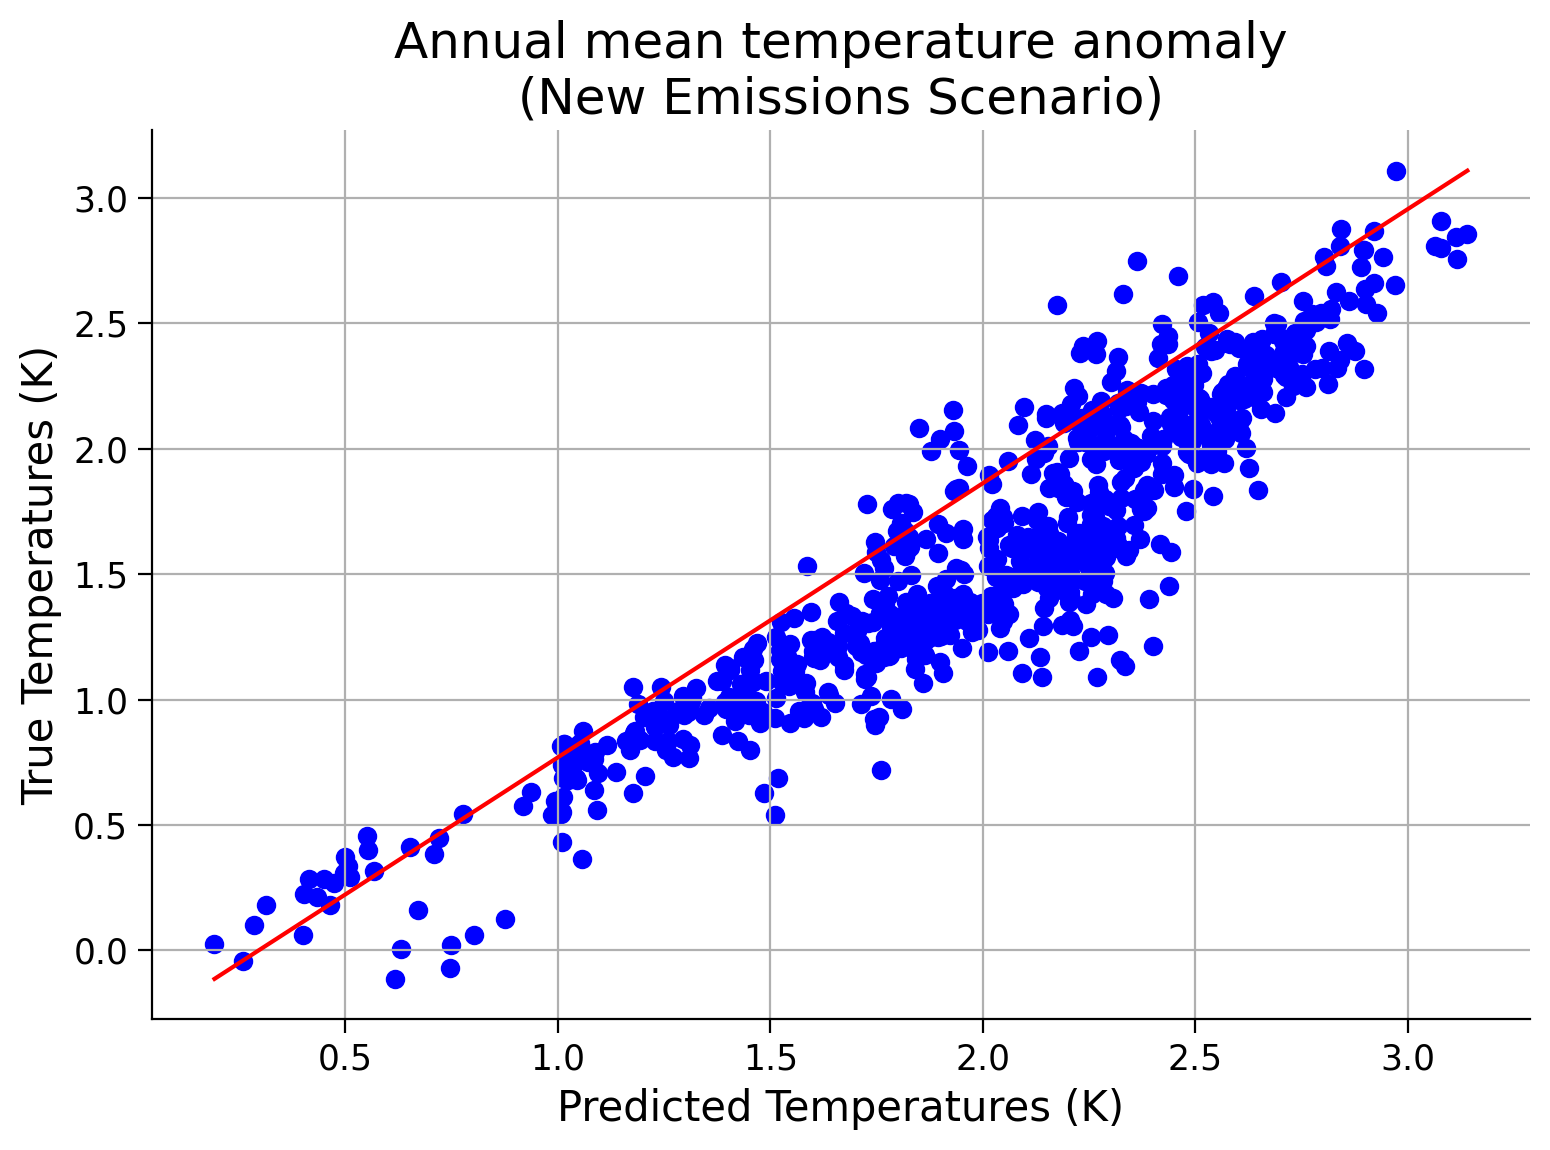

In [23]:
def evaluate_and_plot_scenario_performance(rf_regressor, scenario_test_data, scenario_test_target):
    """Evaluate the performance of the pre-trained model on the new emissions scenario
    and create a scatter plot of predicted vs. true temperature values.

    Args:
        rf_regressor (RandomForestRegressor): Pre-trained Random Forest regressor model.
        scenario_test_data (ndarray): Test features for the new emissions scenario.
        scenario_test_target (ndarray): True temperature values of the new emissions scenario.

    Returns:
        float: Score of the model on the new emissions scenario.
    """

    # Drop the target variable from the test data before making predictions and scoring
    scenario_test_features = scenario_test_data.drop(columns=['tas_FINAL'])

    # predict temperature values for the new emissions scenario
    scenario_test_predicted = rf_regressor.predict(scenario_test_features)

    # evaluate the model on the new emissions scenario
    scenario_test_score = rf_regressor.score(scenario_test_features, scenario_test_target)
    print("Scenario Test Score:", scenario_test_score)

    # implement plt.scatter() to compare predicted and true temperature values
    plt.figure()
    _ = plt.scatter(scenario_test_predicted, scenario_test_target, color='b',  label='Comparison of Predicted and True Temperatures')
    # implement plt.plot() to plot the diagonal line y=x
    _ = plt.plot([min(scenario_test_predicted), max(scenario_test_predicted)], [min(scenario_test_target), max(scenario_test_target)], color='r',label='Ideal Line')

    # aesthetics
    plt.xlabel('Predicted Temperatures (K)')
    plt.ylabel('True Temperatures (K)')
    plt.title('Annual mean temperature anomaly\n(New Emissions Scenario)')
    plt.grid(True)
    plt.show()

    return scenario_test_score

# test your function
scenario_test_score = evaluate_and_plot_scenario_performance(rf_regressor, scenario_test_data, scenario_test_target)

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D4_AIandClimateChange/solutions/W2D4_Tutorial5_Solution_467c5f77.py)

*Example output:*

<img alt='Solution hint' align='left' width=775.0 height=575.0 src=https://raw.githubusercontent.com/neuromatch/climate-course-content/main/tutorials/W2D4_AIandClimateChange/static/W2D4_Tutorial5_Solution_467c5f77_1.png>



[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D4_AIandClimateChange/solutions/W2D4_Tutorial5_Solution_ecbd72cf.py)



In [13]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Coding_Exercise_1_2")

### Question 1.2: Performance of the Model on New Scenario Data

1. Again, have you observed a decrease in the score?   
2. What do you believe could be the cause of this?   
3. What kind of new scenarios might the model perform better for?

[*Click for solution*](https://github.com/neuromatch/climate-course-content/tree/main/tutorials/W2D4_AIandClimateChange/solutions/W2D4_Tutorial5_Solution_593ef299.py)



In [14]:
# @title Submit your feedback
content_review(f"{feedback_prefix}_Questions_1_2")

For the sake of clarity let's summarize all the result.

In [15]:
# summarize results
train_score = rf_regressor.score(X_train, y_train)
test_score  = rf_regressor.score(X_test, y_test)
#average_score = (train_score + test_score + spatial_test_score + scenario_test_score) / 4

print(f"\tTraining Data Score                             : {train_score}")
print(f"\tTesting Data Score on same Scenario/Region      : {test_score}")
print(f"\tHeld-out Spatial Region Test Score              : {spatial_test_score}")
print(f"\tHeld-out Scenario Test Score                    : {scenario_test_score}")

	Training Data Score                             : 0.9905995322600848
	Testing Data Score on same Scenario/Region      : 0.9280672746455216
	Held-out Spatial Region Test Score              : 0.5472680288793538
	Held-out Scenario Test Score                    : Ellipsis


This shows us that the model does generalize somewhat (i.e. the score is well above zero even in the new regions and in the new scenario). However, it does not generalize very well. That is, it does not perform as well on data that differs from the data it was trained on. Ideally, we would be able to build a model that inherently learns the complex relationship between emissions scenarios and future temperature. A model that truly learned this relationship would be able to generalize to new scenarios and regions.


Do you have any ideas of how to build a better machine learning model to emulate climate models? Many scientists are working on this problem!

# Bonus Section 2: Try other Regression Models

*Only complete this section if you are well ahead of schedule, or have already completed the final tutorial.*

Random Forest models are not the only regression models that could be applied to this problem. In this code, we will use scikit-learn to train and evaluate various regression models on the Climate Bench dataset. We will load the data, split it, define models, train them with different settings, and evaluate their performance. We will calculate and print average scores for each model configuration and identify the best-performing model.

For more information about the models used here and various other models, you can refer to [scikit-learn.org/stable/supervised_learning.html#supervised-learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).  
*Note: the following cell may take ~2 minutes to run.*

In [16]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import RidgeCV
import pandas as pd
from sklearn.neural_network import MLPRegressor

# Load datasets
train_val_data = pd.read_csv("https://osf.io/y2pq7/download")
spatial_test_data = pd.read_csv("https://osf.io/7tr49/download")
scenario_test_data = pd.read_csv("https://osf.io/pkbwx/download")

# Pop the 'scenario' column from all datasets
train_val_data.pop('scenario')
spatial_test_data.pop('scenario')
scenario_test_data.pop('scenario')

# Split train_val_data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_val_data.drop(columns=["tas_FINAL"]),
                                                    train_val_data["tas_FINAL"],
                                                    test_size=0.2,
                                                    random_state=1)

# Define models with different configurations
models = {
    "MLP": [make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000)),
            make_pipeline(StandardScaler(), MLPRegressor(hidden_layer_sizes=(500, 500, 500), random_state=1, max_iter=1000))],
    "RandomForest": [make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=100, max_depth=None)),
                     make_pipeline(StandardScaler(), RandomForestRegressor(n_estimators=50, max_depth=10))],
    "GradientBoosting": [make_pipeline(StandardScaler(), GradientBoostingRegressor(n_estimators=100, max_depth=3)),
                         make_pipeline(StandardScaler(), GradientBoostingRegressor(n_estimators=50, max_depth=2))],
    "BaggingRegressor": [make_pipeline(StandardScaler(), BaggingRegressor(n_estimators=100)),
                         make_pipeline(StandardScaler(), BaggingRegressor(n_estimators=50))],
    "SVR": [make_pipeline(StandardScaler(), SVR(kernel="linear")),
            make_pipeline(StandardScaler(), SVR(kernel="rbf"))],
    "LinearRegression": [make_pipeline(StandardScaler(), LinearRegression())],
    "Ridge": [make_pipeline(StandardScaler(), Ridge())],
    "RidgeCV":[RidgeCV(alphas=[167], cv=5)],
    "Lasso": [make_pipeline(StandardScaler(), Lasso())],
    "ElasticNet": [make_pipeline(StandardScaler(), ElasticNet())]
}

# Train models and calculate score for each configuration
results = {}
for model_name, model_list in models.items():
    model_results = []
    for config_num, model in enumerate(model_list):  # Add enumeration for configuration number
        # Train model
        model.fit(X_train, y_train)

        # Calculate scores
        train_score = model.score(X_train, y_train)
        test_score = model.score(X_test, y_test)
        spatial_test_score = model.score(spatial_test_data.drop(columns=["tas_FINAL"]), spatial_test_data["tas_FINAL"])
        scenario_test_score = model.score(scenario_test_data.drop(columns=["tas_FINAL"]), scenario_test_data["tas_FINAL"])

        # Append results
        model_results.append({
            "Configuration": config_num,  # Add configuration number
            "Training Score": train_score,
            "Testing Score": test_score,
            "Spatial Test Score": spatial_test_score,
            "Scenario Test Score": scenario_test_score
        })

        # Calculate average score for the model
    average_score = sum(sum(result.values()) for result in model_results) / (len(model_results) * 4)

    # Store results including average score
    results[model_name] = {"Average Score": average_score, "Results": model_results}

# Print results including average score for each model
for model_name, model_data in results.items():
    print(f"Model:\t{model_name}")
    print(f"Average Score:\t\t\t\t {model_data['Average Score']}")
    print("Configuration-wise Average Scores:")
    for result in model_data['Results']:
        print(f"\nConfiguration {result['Configuration']}: "
              f"\nTraining Score: {result['Training Score']}, "
              f"\nTesting Score: {result['Testing Score']}, "
              f"\nSpatial Test Score: {result['Spatial Test Score']}, "
              f"\nScenario Test Score: {result['Scenario Test Score']}")
    print()

# Find the best model and its average score
best_model = max(results, key=lambda x: results[x]["Average Score"])
best_average_score = results[best_model]["Average Score"]

# Print the best model and its average score
print(f"\nBest Model: {best_model}, Average Score: {best_average_score}")

Model:	MLP
Average Score:				 -0.693172013792119
Configuration-wise Average Scores:

Configuration 0: 
Training Score: 0.8692503611532663, 
Testing Score: 0.8535892907489993, 
Spatial Test Score: 0.3689326066016526, 
Scenario Test Score: -7.457137388084657

Configuration 1: 
Training Score: 0.962684842719046, 
Testing Score: 0.9393082767757127, 
Spatial Test Score: 0.20830069477997415, 
Scenario Test Score: -3.290304795030945

Model:	RandomForest
Average Score:				 0.8376862249020061
Configuration-wise Average Scores:

Configuration 0: 
Training Score: 0.9908390674282823, 
Testing Score: 0.9292799736146469, 
Spatial Test Score: 0.5430064729252191, 
Scenario Test Score: 0.5696349183701392

Configuration 1: 
Training Score: 0.9724321591813795, 
Testing Score: 0.9155882461495928, 
Spatial Test Score: 0.4811558824696762, 
Scenario Test Score: 0.2995530790771125

Model:	GradientBoosting
Average Score:				 0.743425464174884
Configuration-wise Average Scores:

Configuration 0: 
Training Score

Let's plot the result.    
*Note: This code will plot the actual score for positive average scores and zero for negative average scores.*

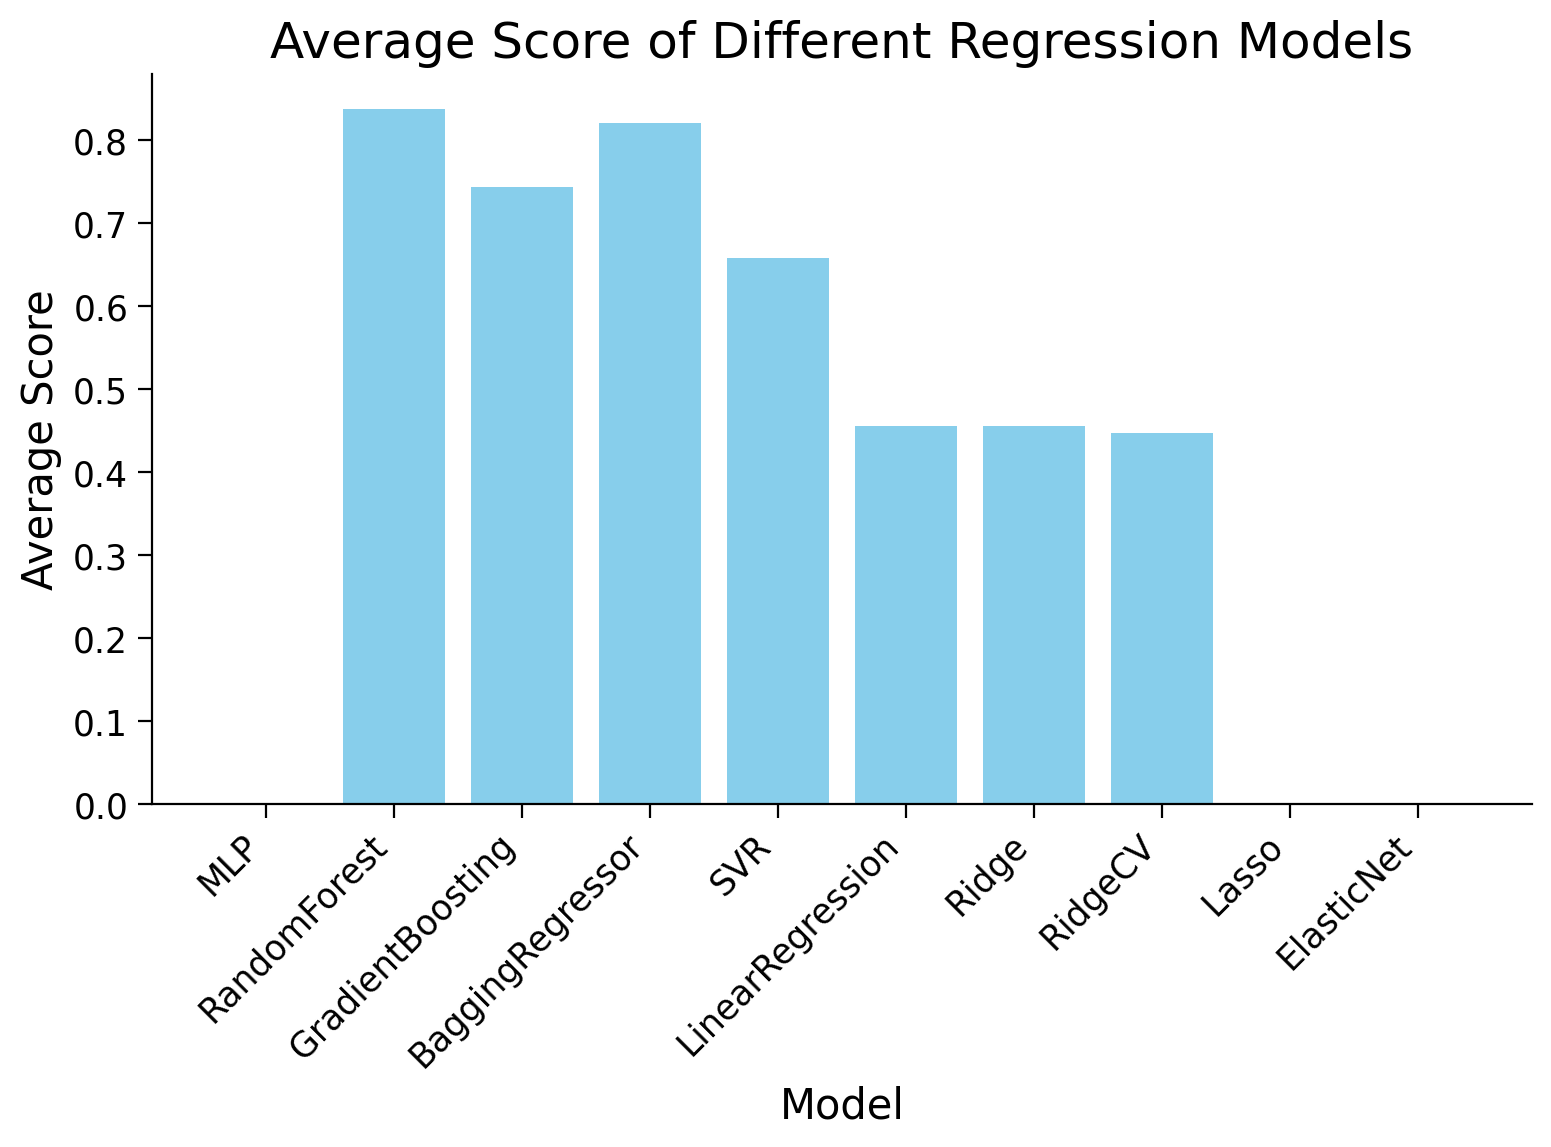

In [17]:
# @title
# @markdown Run this cell to see the plot of results!

import matplotlib.pyplot as plt

# Extract model names and average scores from results
model_names = list(results.keys())
average_scores = [results[model_name]["Average Score"] for model_name in model_names]

# Adjust scores to plot zero for negative scores
adjusted_scores = [score if score > 0 else 0 for score in average_scores]

# Plotting
plt.figure()
plt.bar(model_names, adjusted_scores, color=['skyblue' if score > 0 else 'lightgray' for score in average_scores])
plt.xlabel('Model')
plt.ylabel('Average Score')
plt.title('Average Score of Different Regression Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

This quick sweep of models suggests Random Forest is a good choice, but recall that most of these models have hyperparameters. Varying these hyperparameters may lead to different results!



# Summary

In this tutorial, we explored how machine learning models adapt to unfamiliar emissions scenarios. Evaluating model performance on datasets representing different emission scenarios provided insights into the models' capabilities in predicting climate variables under diverse environmental conditions.


# Resources

* [ClimateBench v1.0: A Benchmark for Data-Driven Climate Projections](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2021MS002954)
* [Scikit-learn.org, Supervised Learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)